In [1]:
#IMPORT LIBRARIES
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the dataset
mental_data = pd.read_csv('Mental Health Dataset.csv')

df = mental_data.copy()  # make a copy of the dataset
df.head()

,Timestamp,Gender,Country,Occupation,self_employed,family_history,treatment,Days_Indoors,Growing_Stress,Changes_Habits,Mental_Health_History,Mood_Swings,Coping_Struggles,Work_Interest,Social_Weakness,mental_health_interview,care_options
0,8/27/2014 11:29,Female,United States,Corporate,NaN,No,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Not sure
1,8/27/2014 11:31,Female,United States,Corporate,NaN,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,No
2,8/27/2014 11:32,Female,United States,Corporate,NaN,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Yes
3,8/27/2014 11:37,Female,United States,Corporate,No,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,Maybe,Yes
4,8/27/2014 11:43,Female,United States,Corporate,No,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Yes


# DATA CLEANING

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 292364 entries, 0 to 292363
Data columns (total 17 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   Timestamp                292364 non-null  object
 1   Gender                   292364 non-null  object
 2   Country                  292364 non-null  object
 3   Occupation               292364 non-null  object
 4   self_employed            287162 non-null  object
 5   family_history           292364 non-null  object
 6   treatment                292364 non-null  object
 7   Days_Indoors             292364 non-null  object
 8   Growing_Stress           292364 non-null  object
 9   Changes_Habits           292364 non-null  object
 10  Mental_Health_History    292364 non-null  object
 11  Mood_Swings              292364 non-null  object
 12  Coping_Struggles         292364 non-null  object
 13  Work_Interest            292364 non-null  object
 14  Social_Weakness     

In [4]:
#292364 rows x 17 columns

In [6]:
df.describe()

,Timestamp,Gender,Country,Occupation,self_employed,family_history,treatment,Days_Indoors,Growing_Stress,Changes_Habits,Mental_Health_History,Mood_Swings,Coping_Struggles,Work_Interest,Social_Weakness,mental_health_interview,care_options
count,292364,292364,292364,292364,287162,292364,292364,292364,292364,292364,292364,292364,292364,292364,292364,292364,292364
unique,580,2,35,5,2,2,2,5,3,3,3,3,2,3,3,3,3
top,8/27/2014 11:43,Male,United States,Housewife,No,No,Yes,1-14 days,Maybe,Yes,No,Medium,No,No,Maybe,No,No
freq,2384,239850,171308,66351,257994,176832,147606,63548,99985,109523,104018,101064,154328,105843,103393,232166,118886


In [8]:
# Percentage of Missing values
(df.isnull().mean()*100).round(1)

Timestamp                  0.0
Gender                     0.0
Country                    0.0
Occupation                 0.0
self_employed              1.8
family_history             0.0
treatment                  0.0
Days_Indoors               0.0
Growing_Stress             0.0
Changes_Habits             0.0
Mental_Health_History      0.0
Mood_Swings                0.0
Coping_Struggles           0.0
Work_Interest              0.0
Social_Weakness            0.0
mental_health_interview    0.0
care_options               0.0
dtype: float64

In [9]:
# Drop rows with missing values in 'self_employed' column
df = df.dropna(subset=['self_employed'])

print(df.isnull().sum())

Timestamp                  0
Gender                     0
Country                    0
Occupation                 0
self_employed              0
family_history             0
treatment                  0
Days_Indoors               0
Growing_Stress             0
Changes_Habits             0
Mental_Health_History      0
Mood_Swings                0
Coping_Struggles           0
Work_Interest              0
Social_Weakness            0
mental_health_interview    0
care_options               0
dtype: int64


In [10]:
# Check for Percentage of Duplicated rows
duplicates = df.duplicated().mean()
print(f" Percentage of duplicates: {duplicates: .1%}")
print()  # blank line

# Drop duplicated rows
df = df.drop_duplicates()
duplicated = df.duplicated().mean()
print(f" Percentage of duplicated: {duplicated: .1%}")

 Percentage of duplicates:  0.8%

 Percentage of duplicated:  0.0%


# 1. Gender Distribution in Mental Health Data by Country

<function matplotlib.pyplot.show(close=None, block=None)>

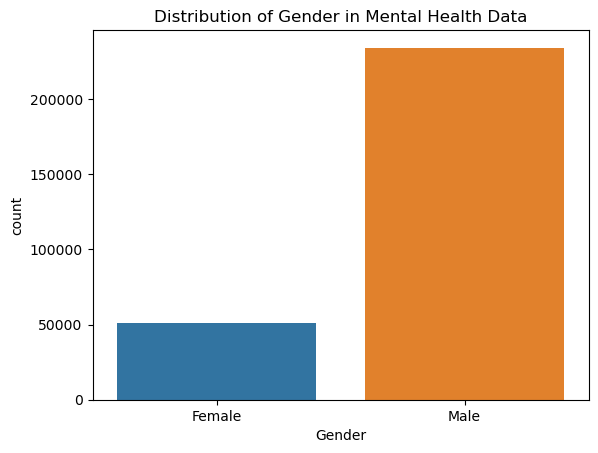

In [11]:
# Distribution of Gender in Mental Health Data
sns.countplot(x= 'Gender', data= df)
plt.title('Distribution of Gender in Mental Health Data')
plt.show

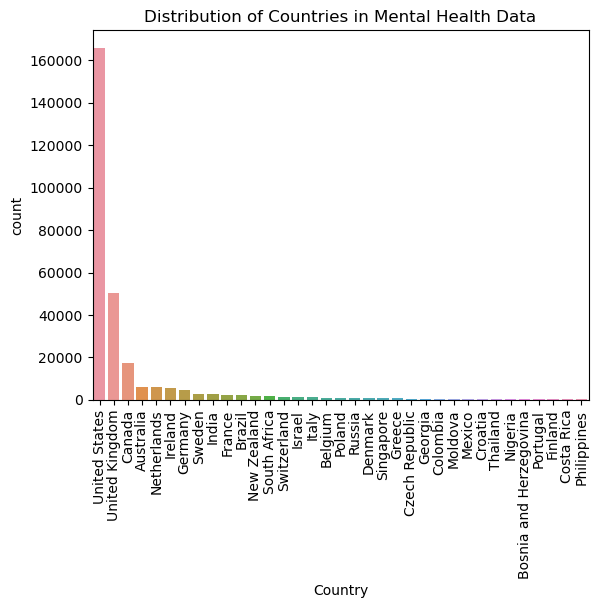

In [12]:
# Distribution of Countries in Mental Health Data
sns.countplot(x = 'Country',data= df, order= df['Country'].value_counts().index)
plt.xticks(rotation=90)  # Rotate x-axis labels after creating the plot
plt.title('Distribution of Countries in Mental Health Data')
plt.show()

In [13]:
# Group data by country and calculate gender counts
gender_counts = df.groupby('Country')['Gender'].value_counts().unstack(fill_value=0)

# Calculate total counts per country
gender_counts['Total'] = gender_counts.sum(axis=1)

# Sort the table by the 'Total' column in descending order
sorted_gender_counts = gender_counts.sort_values(by='Total', ascending=False)
sorted_gender_counts

Gender,Female,Male,Total
Country,,,
United States,34049,131820,165869
United Kingdom,6896,43680,50576
Canada,3879,13650,17529
Australia,1724,4290,6014
Netherlands,431,5460,5891
Ireland,862,4680,5542
Germany,0,4680,4680
Sweden,862,1950,2812
India,431,2340,2771


# Insights from Analysis 1¶


The number of Female participants is much lower than Males. The way the data was collected might have led to an underrepresentation of Females.

The distribution of participants across countries is uneven. The United States has the highest number of participants, followed by the United Kingdom and Canada. Poland and Belgium are the only countries with a higher number of Women.

# 2. Gender Distribution and Growing Stress: A Look at Different Occupations
I aim to identify potential trends or relationships between Gender,Occupation, and the presence of Growing Stress

#### Proportion of Growing Stress within each Gender

In [14]:
# Calculate total counts of responses for each Gender
gender_stress_counts = df['Gender'].value_counts()
print(gender_stress_counts.to_string())
print()  # blank line

# Proportion of Growing Stress within each Gender
gender_stress_prop = df.groupby('Gender')['Growing_Stress'].value_counts().unstack().div(gender_stress_counts, axis=0)
gender_stress_prop

Male      234000
Female     50858



Growing_Stress,Maybe,No,Yes
Female,0.301624,0.301624,0.396752
Male,0.351282,0.320513,0.328205


## Occupation vs. Growing Stress

In [15]:
# Group by Occupation, calculate Growing Stress 
occupation_stress= df.groupby('Occupation')['Growing_Stress'].value_counts().unstack()
occupation_stress

Growing_Stress,Maybe,No,Yes
Occupation,,,
Business,16632,13868,18422
Corporate,16632,19642,23340
Housewife,23576,22032,19120
Others,17950,18550,14930
Student,22750,16248,21166


### Gender Differences in Growing Stress Across Occupations

In [16]:
# Group by Gender and Occupation, calculate counts for Growing Stress
occupation_gender_stress= df.groupby(['Occupation','Gender'])['Growing_Stress'].value_counts().unstack(fill_value=0)
occupation_gender_stress

Growing_Stress     Maybe     No    Yes
Occupation Gender                     
Business   Female   2832   3068   3422
           Male    13800  10800  15000
Corporate  Female   2832   2242   3540
           Male    13800  17400  19800
Housewife  Female   3776   2832   4720
           Male    19800  19200  14400
Others     Female   2950   2950   4130
           Male    15000  15600  10800
Student    Female   2950   4248   4366
           Male    19800  12000  16800

### Proportions of Growing Stress by Occupation & Gender

In [17]:
# Calculate total counts per Occupation and Gender combination
occupation_gender_stress['Total'] = occupation_gender_stress.sum(axis=1)

# Calculate proportions for Growing Stress within each Occupation and Gender group
occupation_gender_stress_prop = occupation_gender_stress.div(occupation_gender_stress['Total'], axis=0)

# Drop the 'Total' column as it's not needed for proportions
occupation_gender_stress_prop = occupation_gender_stress_prop.drop('Total', axis=1)
occupation_gender_stress_prop

Growing_Stress        Maybe        No       Yes
Occupation Gender                              
Business   Female  0.303797  0.329114  0.367089
           Male    0.348485  0.272727  0.378788
Corporate  Female  0.328767  0.260274  0.410959
           Male    0.270588  0.341176  0.388235
Housewife  Female  0.333333  0.250000  0.416667
           Male    0.370787  0.359551  0.269663
Others     Female  0.294118  0.294118  0.411765
           Male    0.362319  0.376812  0.260870
Student    Female  0.255102  0.367347  0.377551
           Male    0.407407  0.246914  0.345679

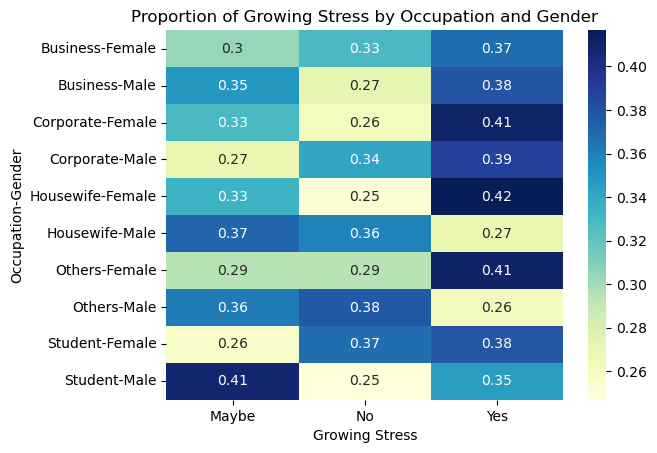

In [18]:
# Heatmap showing the Proportion of Growing Stress by Occupation and Gender
sns.heatmap(occupation_gender_stress_prop, annot=True, cmap="YlGnBu")  
plt.xlabel("Growing Stress")
plt.ylabel("Occupation-Gender")
plt.title("Proportion of Growing Stress by Occupation and Gender")
plt.show()

# Insights from Analysis 2
A higher proportion of Women in all occupations but Business have reported experiencing Growing Stress. This is interesting considering there were fewer female participants.
Regardless of Gender, specific occupations like Corporate, Students and Housewife report individuals with high Growing Stress respectively.

# 3. Relationship Between Mental Health History, Growing Stress and Treatment Seeking Among Students by Country

### Co-occurrence of Mental Health History and Growing Stress in Students

Growing_Stress         Maybe    No   Yes
Mental_Health_History                   
Maybe                   6344  5498  8242
No                      8380  5498  8616
Yes                     8026  5252  4308



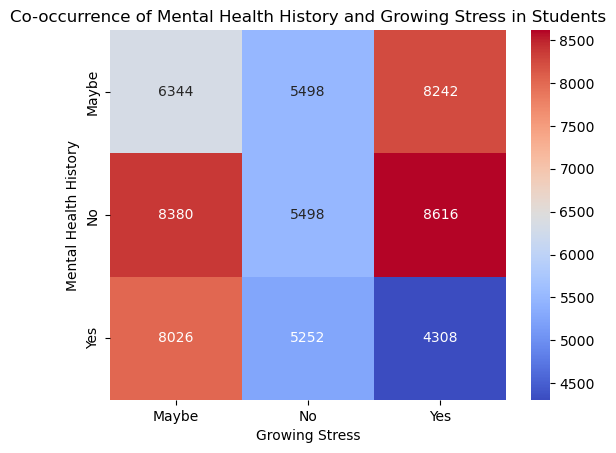

In [19]:
# Filter data for Students only 
student_data = df[df['Occupation'] == 'Student']

# Create a crosstabulation table
mental_health_stress_crosstab = pd.crosstab(student_data["Mental_Health_History"], student_data["Growing_Stress"])

# Print the crosstabulation table
print(mental_health_stress_crosstab)
print()  # blank line

# Generate a heatmap using seaborn
sns.heatmap(mental_health_stress_crosstab, annot=True, cmap="coolwarm", fmt=".0f")
plt.xlabel("Growing Stress")
plt.ylabel("Mental Health History")
plt.title("Co-occurrence of Mental Health History and Growing Stress in Students")
plt.show()

## Distribution of Student Mental Health History by Country

In [20]:
# Students with Mental_Health_History
student_mental_history_by_country = student_data.groupby('Country')['Mental_Health_History'].value_counts().unstack(fill_value=0)

# Add a 'Total' column by summing across all Mental_Health_History columns
student_mental_history_by_country['Total'] = student_mental_history_by_country.sum(axis=1)

# Sort by total student count (optional)
sorted_student_mental_history = student_mental_history_by_country.sort_values(by='Total', ascending=False)
sorted_student_mental_history

Mental_Health_History,Maybe,No,Yes,Total
Country,,,,
United States,11790,13085,10245,35120
United Kingdom,3520,4000,3120,10640
Canada,1252,1382,1083,3717
Australia,438,473,372,1283
Netherlands,402,467,363,1232
Ireland,388,438,342,1168
Germany,312,372,288,972
Sweden,206,221,174,601
India,194,219,171,584


### Treatment-Seeking Behaviour Among Students by Country and Mental Health History

In [21]:
# Group by Country and Mental Health History, calculate counts for treatment
treatment_mental_history_by_country = student_data.groupby(['Country', 'Mental_Health_History'])['treatment'].value_counts().unstack(fill_value=0)

print('Treatment-Seeking Behaviour Among Students by Country and Mental Health History: ')
print() # blank line

print(treatment_mental_history_by_country.to_string())

Treatment-Seeking Behaviour Among Students by Country and Mental Health History: 

treatment                                       No   Yes
Country                Mental_Health_History            
Australia              Maybe                   168   270
                       No                      188   285
                       Yes                     147   225
Belgium                Maybe                    64     0
                       No                       64     0
                       Yes                      51     0
Bosnia and Herzegovina Maybe                    26     0
                       No                       31     0
                       Yes                      24     0
Brazil                 Maybe                   104    52
                       No                      124    62
                       Yes                      96    48
Canada                 Maybe                   506   746
                       No                      591   791
     

### Treatment-Seeking Behaviour Among Students by Country and Growing Stress

In [22]:
# Group by Country and Growing Stress, calculate counts for treatment
treatment_by_country_stress = student_data.groupby(['Country', 'Growing_Stress'])['treatment'].value_counts().unstack(fill_value=0)

print('Treatment-Seeking Behaviour Among Students by Country and Growing Stress:')
print() # blank line

treatment_by_country_stress   

Treatment-Seeking Behaviour Among Students by Country and Growing Stress:



treatment                        No   Yes
Country        Growing_Stress            
Australia      Maybe            190   273
               No               136   228
               Yes              177   279
Belgium        Maybe             58     0
               No                56     0
...                             ...   ...
United Kingdom No              1416  1400
               Yes             1902  1826
United States  Maybe           6177  6952
               No              4244  5360
               Yes             5620  6767

[105 rows x 2 columns]

## Insights from Analysis 3
First of all, it's important to remember that correlation doesn't necessarily imply causation. In this case, I want to know if there's a relationship between Growing Stress and Mental Health History in Students. While stress might contribute to mental health issues, it's also possible that pre-existing mental health conditions can lead to increased stress. Other factors besides stress, such as academic pressure, social environment, or access to resources, could also be influencing mental health.

A significant number of students across all countries reported having some form of mental health history ("Maybe", "Yes"). This suggests a widespread need for mental health resources and support for students.

Those in Developed countries like United States, United Kingdom, Canada, Australia etc, have more students seeking Treatment. This is whether or not they reported having mental health history or Growing stress.

Gap Between Need and Action: While a number of students report mental health concerns,there seems to be a gap between those who need and those who seek treatment ("Yes"). This could indicate stigma around seeking help or lack of accessible resources.

# 4. Treatment-Seeking Behaviour: A Comparative Analysis of Men and Women

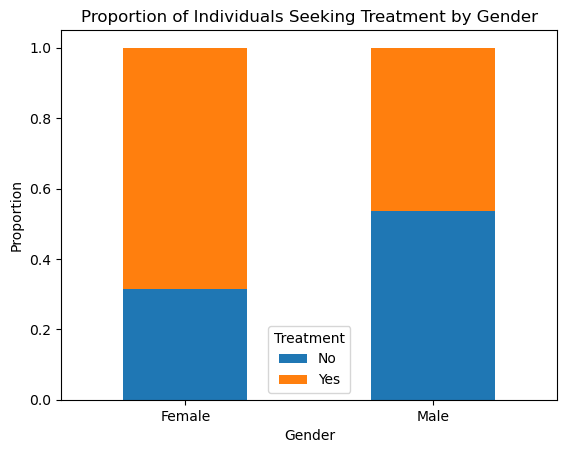

In [23]:
# Examine the relationship between gender and treatment-seeking
treatment_by_gender = pd.crosstab(df['Gender'], df['treatment'])

# Calculate proportions of treatment-seeking by gender for a clearer comparison
treatment_by_gender_prop = treatment_by_gender.div(treatment_by_gender.sum(1), axis=0)

# Barplot of the proportions of individuals seeking treatment by gender
treatment_by_gender_prop.plot(kind='bar', stacked=True)
plt.title('Proportion of Individuals Seeking Treatment by Gender')
plt.ylabel('Proportion')
plt.xlabel('Gender')
plt.xticks(rotation=0)
plt.legend(title='Treatment', labels=['No', 'Yes'])
plt.show()